In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [10]:
import pickle
with open('/home/cohenn1/NCE/notebooks/traced_loss_data_rbm20.out.pickle', 'rb') as f:
    loaded_dict = pickle.load(f)

In [3]:
losses = list(loaded_dict.keys())
print(losses)

['logspace_mse', 'from_logspace_gil1', 'from_logspace_gil1c', 'from_logspace_l1', 'from_logspace_l2', 'from_logspace_gil2']


In [8]:
def get_avg_errs(loaded_dict):
    avg_errs = {}
    for loss in losses:
        runs = []
        for run in loaded_dict[loss]:
            runs.append(run[0])
        avg_errs[loss] = np.mean(runs)
    return avg_errs

In [11]:
get_avg_errs(loaded_dict)

{'logspace_mse': -3.2031063079833983,
 'from_logspace_gil1': -0.3769264221191406,
 'from_logspace_gil1c': -0.33167457580566406,
 'from_logspace_l1': -0.33218231201171877,
 'from_logspace_l2': -0.5523094177246094,
 'from_logspace_gil2': -0.9626102447509766}

In [3]:
# pedigree18_Z_err_err=0.0034942626953125

['logspace_mse', 'from_logspace_gil1', 'from_logspace_gil1c', 'from_logspace_l1', 'from_logspace_l2', 'from_logspace_gil2']


In [5]:
# replcaed_with_correct_error = False
# if not replcaed_with_correct_error:
#     replcaed_with_correct_error = True
#     for key in losses:
#         for i in range(len(loaded_dict[key])):
#             loaded_dict[key][i] = (loaded_dict[key][i][0] - pedigree18_Z_err_err, loaded_dict[key][i][1])

In [6]:
run_indices = range(len(loaded_dict[losses[0]]))
print(run_indices)

range(0, 10)


In [7]:
# Prepare color mapping for loss functions to ensure consistent colors across runs
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_mapping = {loss_name: colors[i % len(colors)] for i, loss_name in enumerate(losses)}
# Define line styles or markers to differentiate runs
line_styles = ['-', '--', '-.', ':', (0, (1, 1)), (0, (5, 5)), (0, (3, 5, 1, 5)), 
               (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (5, 1))]

# Option 2: Use markers
markers = ['o', 's', '^', 'v', '>', '<', 'd', 'p', '*', '+']

# Create run labels
run_labels = [f'Run {i+1}' for i in range(10)]

In [8]:
epoch_size = loaded_dict['from_logspace_gil1'][0][1][1][0]
batch_size = epoch_size

In [ ]:
# Close any existing figures
plt.close('all')

# Determine the number of samples to plot
traced_loss_data = loaded_dict[losses[0]][0][1]
sample_numbers = [row[0] for row in traced_loss_data]
divisors = [1, 10, 100, 500, 1000]
num_epochs_list = [len(sample_numbers) // d for d in divisors]
for num_batches in num_epochs_list: # doing epoch = batch
    num_samples = num_batches * batch_size
    for j in range(len(losses)):
        fig, ax = plt.subplots(figsize=(20, 6))
        # Loop over both runs
        z_errors = [loaded_dict[losses[j]][k][0] for k in range(len(loaded_dict[losses[0]]))]
        for run_index in run_indices:
            traced_loss_data = loaded_dict[losses[j]][run_index][1]
            sample_numbers = [row[0] for row in traced_loss_data]
            loss_data_dict = {losses[i]: [row[i+1] for row in traced_loss_data] for i in range(len(losses))}

            # Apply log transformation if necessary
            if 'logspace_mse' in loss_data_dict:
                loss_data_dict['logspace_mse'] = [np.log(loss) for loss in loss_data_dict['logspace_mse']]

            # Plot each loss function data
            for loss_name, loss_values in loss_data_dict.items():
                color = color_mapping.get(loss_name, 'black')  # Default to black if color not found
                linestyle = line_styles[run_index]
                marker = markers[run_index % len(markers)]
                ax.plot(
                    sample_numbers[:num_batches],
                    loss_values[:num_batches],
                    color=color,
                    linestyle=linestyle,
                    marker=marker,
                    markevery=50,
                    label=f'{loss_name} {run_labels[run_index]}'
                )

        # Add labels, legend, and title
        ax.set_xlabel("Sample Numbers")
        ax.set_ylabel("Loss Values")
        ax.set_title("Losses over Samples: " + losses[j] +", batch size: " + str(batch_size) + ", num batches: " + str(num_batches))
        ax.grid(True)
        # Place the legend outside the plot area
        # ax.legend(
        #     bbox_to_anchor=(1.05, 1),
        #     loc='upper left',
        #     borderaxespad=0.
        # )
        
        # Create custom legend entries for Z error values
        z_error_patches = [mpatches.Patch(color='none', label=f'{run_labels[i]} Z err = {z_errors[i]}') for i in range(len(z_errors))]

        # Get existing handles and labels
        handles, labels = ax.get_legend_handles_labels()

        # Combine existing handles and labels with the Z error entries
        all_handles = handles + z_error_patches
        all_labels = labels + [f'{run_labels[i]} Z err = {z_errors[i]}' for i in range(len(z_errors))]

        # Adjust layout to make room for the legend
        fig.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the right margin to make room for the legend

        # Place the legend outside the plot area
        ax.legend(
            all_handles, all_labels,
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.
        )

        # plt.show()
        # Save the plot
        plot_path = '/home/cohenn1/NCE/notebooks/plots/traced_losses/'
        plot_name = 'rbm-20_tracing_losses_' + losses[j] + '_' + str(num_batches) + 'batches_' + 'size_' + str(batch_size) + '.png'
        save_path = plot_path + plot_name
        fig.savefig(save_path, dpi=300, bbox_inches='tight')

/tmp/ipykernel_2593538/542985377.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 6))


In [ ]:
traced_loss_data = loaded_dict['logspace_mse'][0][1]
sample_numbers = [row[0] for row in traced_loss_data]
loss_data_dict = {losses[i]: [row[i+1] for row in traced_loss_data] for i in range(len(losses))}
# change logspace_mse values to log_scale so they can be plotted together
loss_data_dict['logspace_mse'] = [np.log(loss) for loss in loss_data_dict['logspace_mse']]

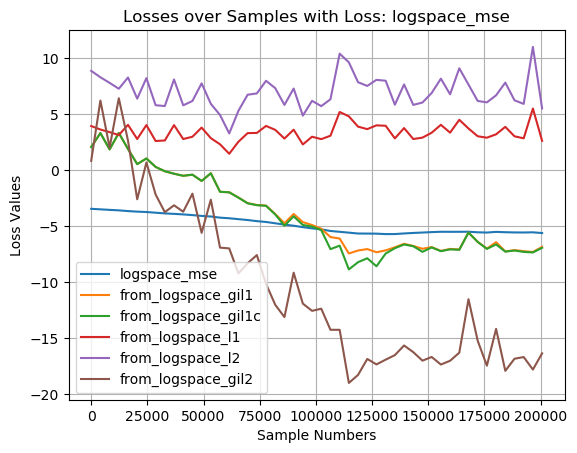

In [ ]:
for j in [0]:
    # Plot each loss function data
    i = len(sample_numbers) // 500
    for loss_name, loss_values in loss_data_dict.items():
        plt.plot(sample_numbers[:i], loss_values[:i], label=loss_name)

    # Add labels, legend, and title
    plt.xlabel("Sample Numbers")
    plt.ylabel("Loss Values")
    plt.title("Losses over Samples with Loss: {}".format(losses[j]))
    plt.legend()  # Automatically use the labels from the 'label' argument in plt.plot
    plt.grid(True)  # Optional: Add a grid for better readability

    # Show the plot
    plt.show()